<a href="https://colab.research.google.com/github/evdelph/MongoDB/blob/main/RedditTimestamps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import numpy as np
import collections
from IPython.display import Image
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [2]:
! pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [3]:
df = pd.read_csv('exploded.csv')
df.head(5)

,created_at,score,upvote_ratio,ups,downs,col,word
0,4/12/2021 19:37,6,0.88,6,0,Aimovig,aimovig
1,4/12/2021 19:37,6,0.88,6,0,year.,year
2,4/12/2021 19:37,6,0.88,6,0,Next,next
3,4/12/2021 19:37,6,0.88,6,0,Emgality,emgality
4,4/12/2021 19:37,6,0.88,6,0,5,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21464 entries, 0 to 21463
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    21464 non-null  object 
 1   score         21464 non-null  int64  
 2   upvote_ratio  21464 non-null  float64
 3   ups           21464 non-null  int64  
 4   downs         21464 non-null  int64  
 5   col           21464 non-null  object 
 6   word          21361 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop('col',inplace=True,axis=1)

In [6]:
df.tail(3)

,created_at,score,upvote_ratio,ups,downs,word
21461,6/29/2018 7:06,11,1.0,11,0,cgrp
21462,6/29/2018 7:06,11,1.0,11,0,migraine
21463,6/29/2018 7:06,11,1.0,11,0,meds


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_day'] = df['created_at'].dt.strftime('%m-%d-%Y')
df['created_at_month'] = df['created_at'].dt.strftime('%m')

In [8]:
subset = df.groupby(by=['created_at_month','word']).count()['ups'].nlargest(100).reset_index().sort_values(by='ups',ascending=False)

In [9]:
subset.head(5)

,created_at_month,word,ups
0,09,aimovig,73
1,03,aimovig,63
2,11,aimovig,62
4,11,im,53
3,02,aimovig,53


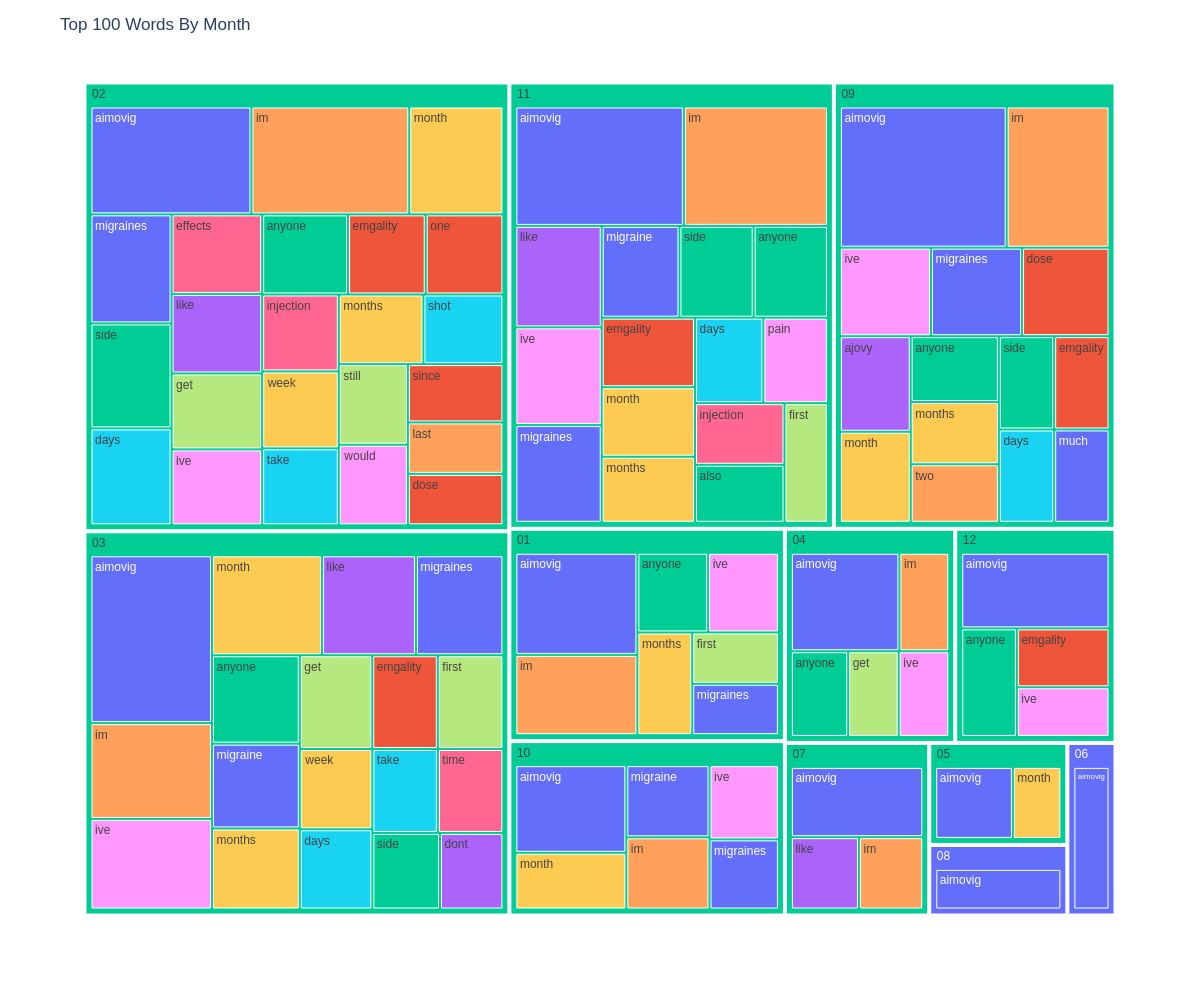

In [10]:
# https://plotly.com/python/treemaps/
fig = px.treemap(subset, path=['created_at_month','word'], values='ups',
                 color='word')
fig.update_layout(
    title='Top 100 Words By Month',
    xaxis_nticks=36,
    width=1200, 
    height=1000
  )
#fig.show() #uncomment to display interactive version
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [11]:
subset2 = df.groupby(by=['created_at','word']).count()['ups'].nlargest(100).reset_index().sort_values(by='created_at')
subset2.head(5)

,created_at,word,ups
94,2018-06-29 07:06:00,aimovig,4
30,2018-09-03 04:45:00,im,5
95,2018-09-03 04:45:00,migraines,4
97,2018-09-11 01:10:00,even,4
96,2018-09-11 01:10:00,dose,4


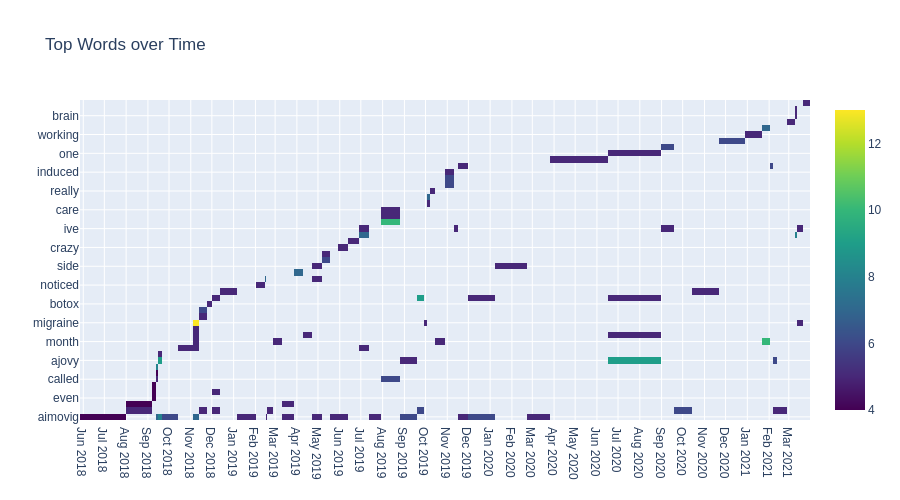

In [12]:
# https://plotly.com/python/heatmaps/

fig = go.Figure(data=go.Heatmap(
        z=subset2['ups'],
        x=subset2['created_at'],
        y=subset2['word'],
        colorscale='Viridis'))

fig.update_layout(
    title='Top Words over Time',
    xaxis_nticks=36,
    width=900, 
    height=500
  )
#fig.show() #uncomment to display interactive version
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [13]:
subset3 = df[['created_at','upvote_ratio','word','ups']].groupby(by=['created_at','word','upvote_ratio']).count()['ups'].nlargest(100).reset_index().sort_values(by='created_at')
subset3.head(5)

,created_at,word,upvote_ratio,ups
94,2018-06-29 07:06:00,aimovig,1.0,4
30,2018-09-03 04:45:00,im,1.0,5
95,2018-09-03 04:45:00,migraines,1.0,4
97,2018-09-11 01:10:00,even,1.0,4
96,2018-09-11 01:10:00,dose,1.0,4


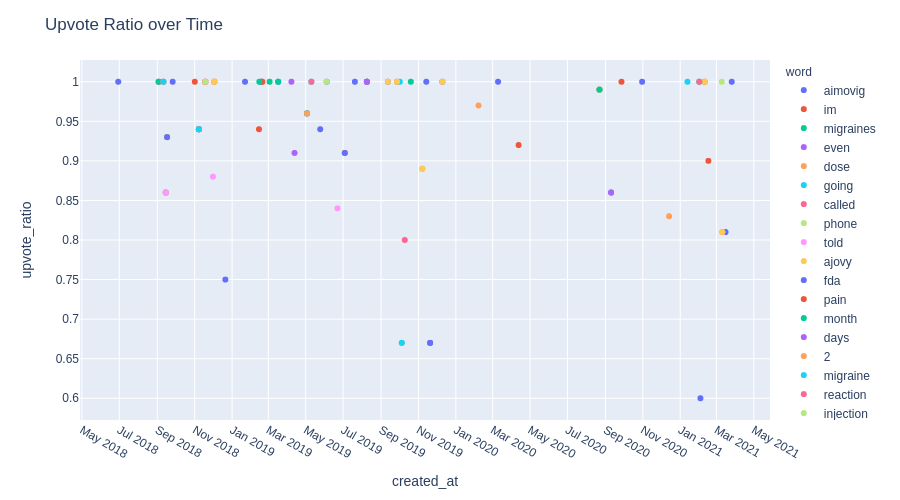

In [14]:
# https://plotly.com/python/setting-graph-size/
fig = px.scatter(subset3, x="created_at", y="upvote_ratio",color="word")

fig.update_layout(
    title='Upvote Ratio over Time',
    xaxis_nticks=36,
    width=900, 
    height=500
  )
#fig.show() #uncomment to display interactive version
img_bytes = fig.to_image(format="png")
Image(img_bytes)